**Group #27's Project Proposal for DSCI 100 Sect.002**

Ella Woolcott, Nylah Grewal, Anoushka Gautam, Loveleen Chandi

**Predicting Diagnosis of Heart Disease Based on Physical Indicator Variables**

**Introduction**

Heart disease is a general term used to describe multiple medical conditions relating to the heart. Analyzing data relating to heart disease can have broad applications in public health and medicine, as heart disease is a leading cause of death. Symptoms of heart disease include chest pains, heart palpitations, and clogged blood vessels. Risk factors include high blood pressure and cholesterol. These variables are observed in the data set…upon wrangling the data, we may observe relationships between the patient’s symptoms and outcome/diagnosis.

The predictive question we are going to answer is:
What variables give the most reliable and accurate predictor outcome? 

The heart disease data set we have chosen to analyze comes from a machine learning repository and contains 4 databases from Cleveland, Long Beach, Hungary, and Switzerland. The dataset contains a lot of medical terminology, as shown in the table of 14 variables. The possible observations for each variable in the data set are categorical, integer, or numerical values.


| Atrribute Number | Varible | Observations Possible | Definition | 
|  :----: |    :----:   |  :----:  |  :----:  |
| 1     | age       | numerical value  | number in years |
| 2   | sex        | 1 = male; 0 = female      |self-explanatory      |
| 3   | chest_pain | Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic     |chest pain type |
| 4   | resting_blood_pressure        | in mm Hg on admission to the hospital     |resting blood pressure  |
| 5   | cholesterol        |  in mg/dl     |serum cholesterol       |
| 6   | fasting_blood_sugar        | 1 = presence of diabetes (or blood sugar of >120mg/dl) and 0 = absence of diabetes (or blood sugar of <120mg/dl)    |fasting blood sugar > 120 mg/dl      |
| 7   | rest_ecg        |Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria      |resting electrocardiographic results    |
| 8   | max_heart_rate       | numerical value      |maximum heart rate achieved   |
| 9   | exercise_induced_angina        | 1 = yes; 0 = no     |exercise induced angina      |
| 10   | ST_depression        | numerical value     |ST depression induced by exercise relative to rest      |
| 11  | ST_slope        | Value 1: upsloping, Value 2: flat, Value 3: downsloping      |the slope of the peak exercise ST segment     |
| 12   | thalassemia        |3 = normal; 6 = fixed defect; 7 = reversible defect       |A blood disorder called thalassemia      |
| 13  | diagnosis        | Value 0: < 50% diameter, Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels), meaning 0 = absence of heart disease while 1 = presence of heart disease      |diagnosis of heart disease (angiographic disease status)      |

**Methods and Results**

In [58]:
#install.packages("leaps")
library(tidyverse)
library(repr)
library(tidymodels)
library(leaps)
options(repr.matrix.max.rows = 6)

**Step 1:** 
Demonstrate that the dataset can be read from the web into R

In [106]:
heart_data<- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE)
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Step 2:**
Clean and wrangle your data into a tidy format

In [107]:
colnames(heart_data) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_slope", "num_major_vessels", "thalassemia", "diagnosis")
#colnames(heart_data)
heart_data_clean <- heart_data[c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_slope", "thalassemia", "diagnosis")]
#heart_data_clean

**Step 3:** 
Convert necessary columns to factors

In [108]:
heart_data_clean$sex <- as.factor(heart_data_clean$sex)
heart_data_clean$chest_pain <- as.factor(heart_data_clean$chest_pain)
heart_data_clean$fasting_blood_sugar <- as.factor(heart_data_clean$fasting_blood_sugar)
heart_data_clean$rest_ecg <- factor(heart_data_clean$rest_ecg, levels = c("0", "1", "2"))
heart_data_clean$exercise_induced_angina <- as.factor(heart_data_clean$exercise_induced_angina)
heart_data_clean$ST_slope <- as.factor(heart_data_clean$ST_slope)
heart_data_clean$thalassemia <- factor(heart_data_clean$thalassemia, levels = c("3", "6", "7"))

heart_data_clean$diagnosis[heart_data_clean$diagnosis == 0] <- 0
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 1] <- 1
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 2] <- 1
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 3] <- 1
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 4] <- 1
heart_data_clean$diagnosis <- as.factor(heart_data_clean$diagnosis)

heart_data_clean

age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,3,NA,0
67,1,4,160,286,0,2,108,1,2,NA,1
67,1,4,120,229,0,2,129,1,2,NA,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,2,NA,1
57,0,2,130,236,0,2,174,0,2,NA,1
38,1,3,138,175,0,0,173,0,1,NA,0


**Step 4:** 
Split into training and testing data

In [109]:
set.seed(20)
heart_split <- initial_split(heart_data_clean, prop = 0.75, strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

**Step 5:** Predictor Selection - select relevant columns as predictor variables

In [110]:
set.seed(20)
heart_data_select <- heart_train |>
    mutate(diagnosis = as.numeric(diagnosis))|>
    select(-thalassemia)

**Step 6:**
Perform feature selection using a model

In [111]:
lm1 <- lm(heart_data_select,formula=diagnosis ~.)
print("Table 1. Regression Summary")
summary(lm1)

[1] "Table 1. Regression Summary"



Call:
lm(formula = diagnosis ~ ., data = heart_data_select)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99558 -0.24019  0.00302  0.23696  0.93151 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.3122762  0.3801506   0.821 0.412311    
age                       0.0043893  0.0032296   1.359 0.175571    
sex1                      0.2619880  0.0585181   4.477 1.24e-05 ***
chest_pain2               0.0456387  0.1107429   0.412 0.680672    
chest_pain3               0.0372372  0.1004071   0.371 0.711110    
chest_pain4               0.3839245  0.0991471   3.872 0.000144 ***
resting_blood_pressure    0.0031256  0.0015316   2.041 0.042518 *  
cholesterol               0.0004895  0.0005269   0.929 0.354007    
fasting_blood_sugar1     -0.0048510  0.0737881  -0.066 0.947645    
rest_ecg1                 0.1414254  0.1997870   0.708 0.479797    
rest_ecg2                 0.0610996  0.0537215   1.137 0.256680    
max_

**Step 7:** Obtain feature importance

In [112]:
Best_Subset <-
    regsubsets(diagnosis~.,
               data =heart_data_select,
               nbest = 1,      # 1 best model for each number of predictors
               nvmax = NULL,    # NULL for no limit on number of variables
               force.in = NULL, force.out = NULL,
               method = "exhaustive")

summary_best_subset <- summary(Best_Subset)
#as.data.frame(summary_best_subset$outmat)

**Step 8:** Find best number of predictors

In [113]:
print("Optimal Number of Predictors:")
which.max(summary_best_subset$adjr2)

[1] "Optimal Number of Predictors:"


[1] 7

**Step 9:** 
Select best 7 predictors

In [114]:
print("Table 2. Best Predictors")
print(summary_best_subset$which[7,])

[1] "Table 2. Best Predictors"
             (Intercept)                      age                     sex1 
                    TRUE                     TRUE                     TRUE 
             chest_pain2              chest_pain3              chest_pain4 
                   FALSE                    FALSE                     TRUE 
  resting_blood_pressure              cholesterol     fasting_blood_sugar1 
                    TRUE                    FALSE                    FALSE 
               rest_ecg1                rest_ecg2           max_heart_rate 
                   FALSE                     TRUE                    FALSE 
exercise_induced_angina1                ST_slope2                ST_slope3 
                    TRUE                     TRUE                    FALSE 


The 7 best predictors for classifying diagnosis with the most important coefficients are: chest pain, resting blood pressure, exercise induced angina, age, resting ecg, ST slope, and sex. 

**Step 10:** 
Summary of training data set containing 7 best predictors

In [115]:
#count of factor predictor variables (fasting blood sugar, rest ECG, ST slope, and chest pain) and target variable (diagnosis)
count_diag <- heart_train|>
    count(diagnosis)
#count_diag

In [116]:
count_sugar <- heart_train|>
    count(sex)
#count_sugar

In [117]:
count_rest_ecg <- heart_train|>
    count(rest_ecg)
#count_rest_ecg

In [118]:
count_slope <- heart_train|>
    count(ST_slope)
#count_slope

In [119]:
count_chestp <- heart_train|>
    count(chest_pain)
#count_chestp

In [120]:
count_chest <- heart_train|>
    count(exercise_induced_angina)
#count_chest

In [121]:
print("Table 3. Count of Diagnosis")
    print("0 = absence of heart disease while 1 = presence of heart disease")
    count_diag
print("Table 4. Count of Sex")
    print("1 = male; 0 = female")
    count_sugar
print("Table 5. Count of ECG Results")
    print("0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy") 
    count_rest_ecg
print("Table 6. Count of ST_slopes")
    print("1 = upsloping, 2 = flat, 3 = downsloping")
    count_slope
print("Table 7. Count of Chest Pain Type")
    print("1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic")
    count_chestp
print("Table 8. Count of Exercised induced Angina")
    print("1 = yes; 0 = no")
    count_chest

[1] "Table 3. Count of Diagnosis"
[1] "0 = absence of heart disease while 1 = presence of heart disease"


diagnosis,n
<fct>,<int>
0,123
1,104


[1] "Table 4. Count of Sex"
[1] "1 = male; 0 = female"


sex,n
<fct>,<int>
0,74
1,153


[1] "Table 5. Count of ECG Results"
[1] "0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy"


rest_ecg,n
<fct>,<int>
0,115
1,4
2,108


[1] "Table 6. Count of ST_slopes"
[1] "1 = upsloping, 2 = flat, 3 = downsloping"


ST_slope,n
<fct>,<int>
1,111
2,102
3,14


[1] "Table 7. Count of Chest Pain Type"
[1] "1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic"


chest_pain,n
<fct>,<int>
1,20
2,36
3,65
4,106


[1] "Table 8. Count of Exercised induced Angina"
[1] "1 = yes; 0 = no"


exercise_induced_angina,n
<fct>,<int>
0,149
1,78


In [122]:
#STATS 
#maximum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)
heart_max <- heart_train |>
  summarize(across(-sex, ~ if(is.numeric(.)) max(.) else first(.))) |>
  select(age, resting_blood_pressure)   
#heart_max
                   
#minimum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)                  
heart_min <- heart_train |>
  summarize(across(-sex, ~ if(is.numeric(.)) min(.) else first(.))) |>
  select(age, resting_blood_pressure)
#heart_min

In [123]:
#averages and standard deviations of continous or discrete variables (age, max_heart_rate)

heart_mean <- heart_train |>
  select(age, resting_blood_pressure) |>
  summarize(across(age:resting_blood_pressure, mean))
#heart_mean

heart_sd <- heart_train |>
  select(age, resting_blood_pressure) |>
  summarize(across(age:resting_blood_pressure, sd))
#heart_sd

In [124]:
# Combine all the summary statistics into one table. 
# Row 1 = minimum value
# Row 2 = maximum value
# Row 3 = mean
# Row 4 = standard deviation
heart_summary <- bind_rows(
  heart_min,
  heart_max,
  heart_mean,
  heart_sd) 
print("Table 10. Summary of Continuous Varible Statistics")
print("Row 1 = minimum value, Row 2 = maximum value, Row 3 = mean, Row 4 = standard deviation")
heart_summary


[1] "Table 10. Summary of Continuous Varible Statistics"
[1] "Row 1 = minimum value, Row 2 = maximum value, Row 3 = mean, Row 4 = standard deviation"


age,resting_blood_pressure
<dbl>,<dbl>
34.000000,94.00000
77.000000,200.00000
54.497797,131.53304
9.265682,17.88564


**Explanation of the Summary Statistics for Training Set**

diagnosis: diagnosis is the target variable. It is a binary categorical variable with 123 observations having an absence of heart disease and 104 observations have a presence of heart disease. 

sex: sex is a binary categorical variable where 74 observations are female and 153 observations are male.

rest_ecg: Resting ECG is a categorical variable where 155 have normal resting electrocardiographic, 4 have some abnormality, and 108 have definite hypertrophy

ST_slope: ST slope is a categorical variable where 111 observations have an upslope heart rate, 102 have flat, and 14 have downward sloping ST heart rates. 

chest_pain: Chest pain is a categorical variable where 20 observations have typical angina, 36 observations have atypical angina, 65 observations have non-anginal pain, and 106 have asymptomatic chest pain. 

exercise_induced_angina: exercise induced angina is a binary logical variable where 149 observations do not have exercised induced angina and 78 observations do.

age: Age is a discrete variable. The minimum age observed in the training data is 34 years, and the maximum age is 77 years. The average age of the patients in the training data is approximately 54.50 years, with a standard deviation of around 9.27 years.

resting_blood_pressure: resting blood pressure is a discrete variable measured in mmHg. The minimum observed blood pressure is 94mmHg and the maximum is 200mmHg. The average resting blood pressure is 131.53mmHg and the standard deviation is 17.89mmHg. 

**Step 11** Visualizations and Comparisons Within the Training Data Set

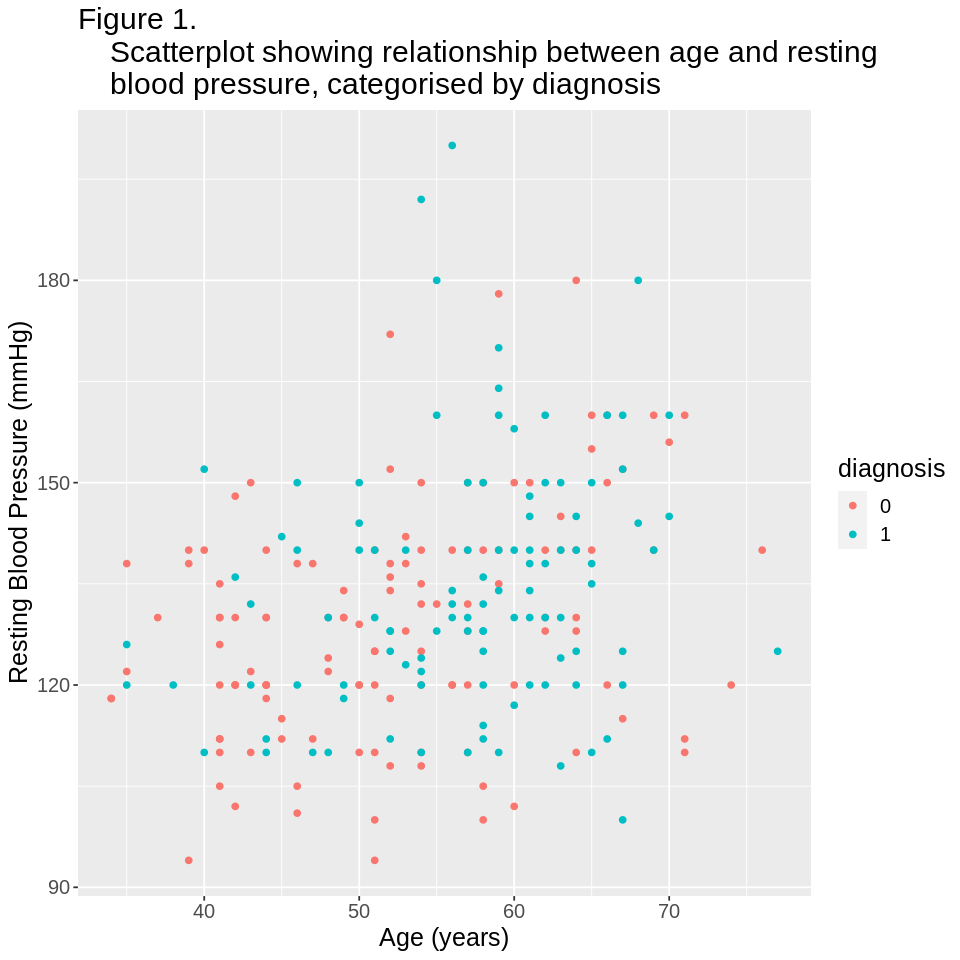

In [125]:
#Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do

#scattor plot showing elationship between age and resting blood pressure, categorised by diagnosis..
options(repr.plot.width = 8, repr.plot.height = 8) 
age_resting_point <- heart_train |>
    ggplot(aes(x = age, y = resting_blood_pressure))+
    geom_point(aes(colour = diagnosis))+
    labs(x = "Age (years)", y = "Resting Blood Pressure (mmHg)")+
    ggtitle("Figure 1. 
    Scatterplot showing relationship between age and resting 
    blood pressure, categorised by diagnosis")+
    theme(text = element_text(size = 15))
age_resting_point

#0 = negative diagnosis. 1 = positive diagnosis.

Shows no significant correlation between age and resting blood pressure. Diagnosis also does not show any correlation.

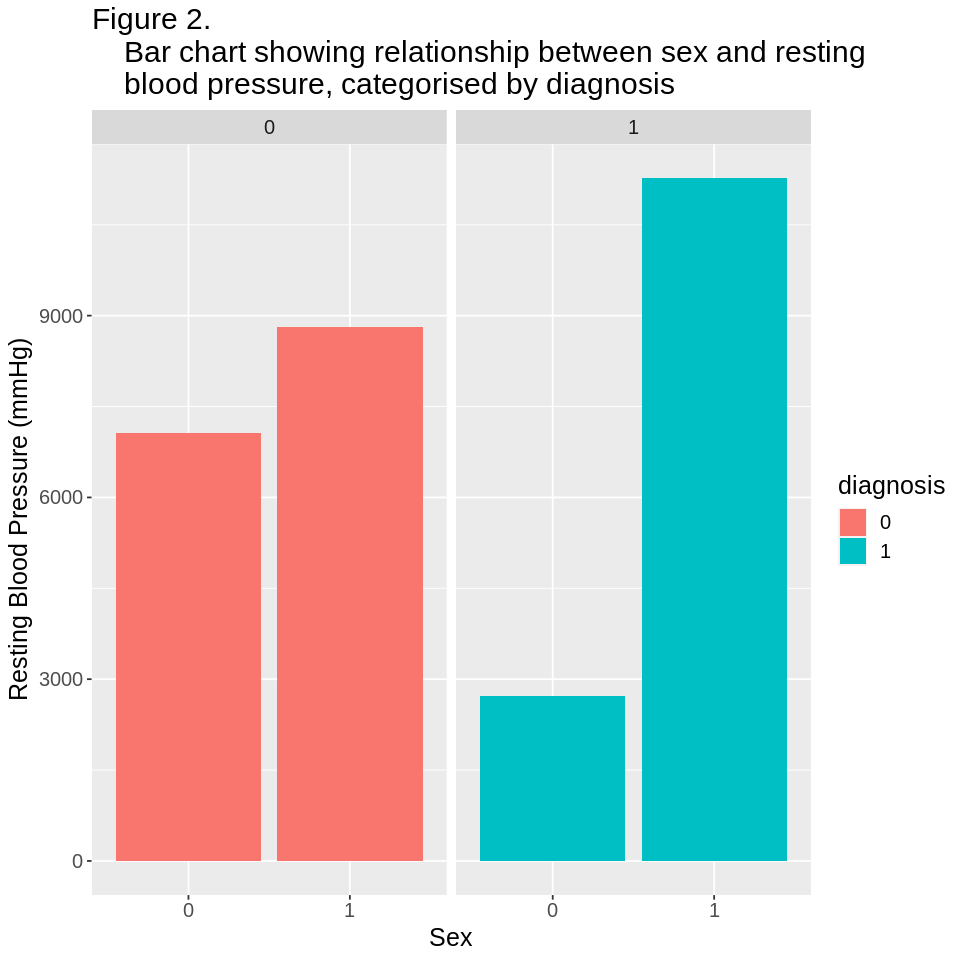

In [140]:
#bar chart showing the relations between sex and resting blood pressure, categorised by diagnosis
options(repr.plot.width = 8, repr.plot.height = 8) 
sex_rest_bar <- heart_train |>
    ggplot(aes(x = sex, y = resting_blood_pressure, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Sex", y = "Resting Blood Pressure (mmHg)")+
    ggtitle("Figure 2. 
    Bar chart showing relationship between sex and resting 
    blood pressure, categorised by diagnosis")+
    theme(text = element_text(size = 15))
sex_rest_bar

#0 = negative diagnosis. 1 = positive diagnosis.

Diagnosis: 0 = absence of heart disease while 1 = presence of heart disease

Sex: 1 = male; 0 = female

Women with heart disease have a lower resting blood pressure than women who do not have heart disease. Contrastingly, men with heart disease have a higher blood pressure than men who don't have heart disease. 

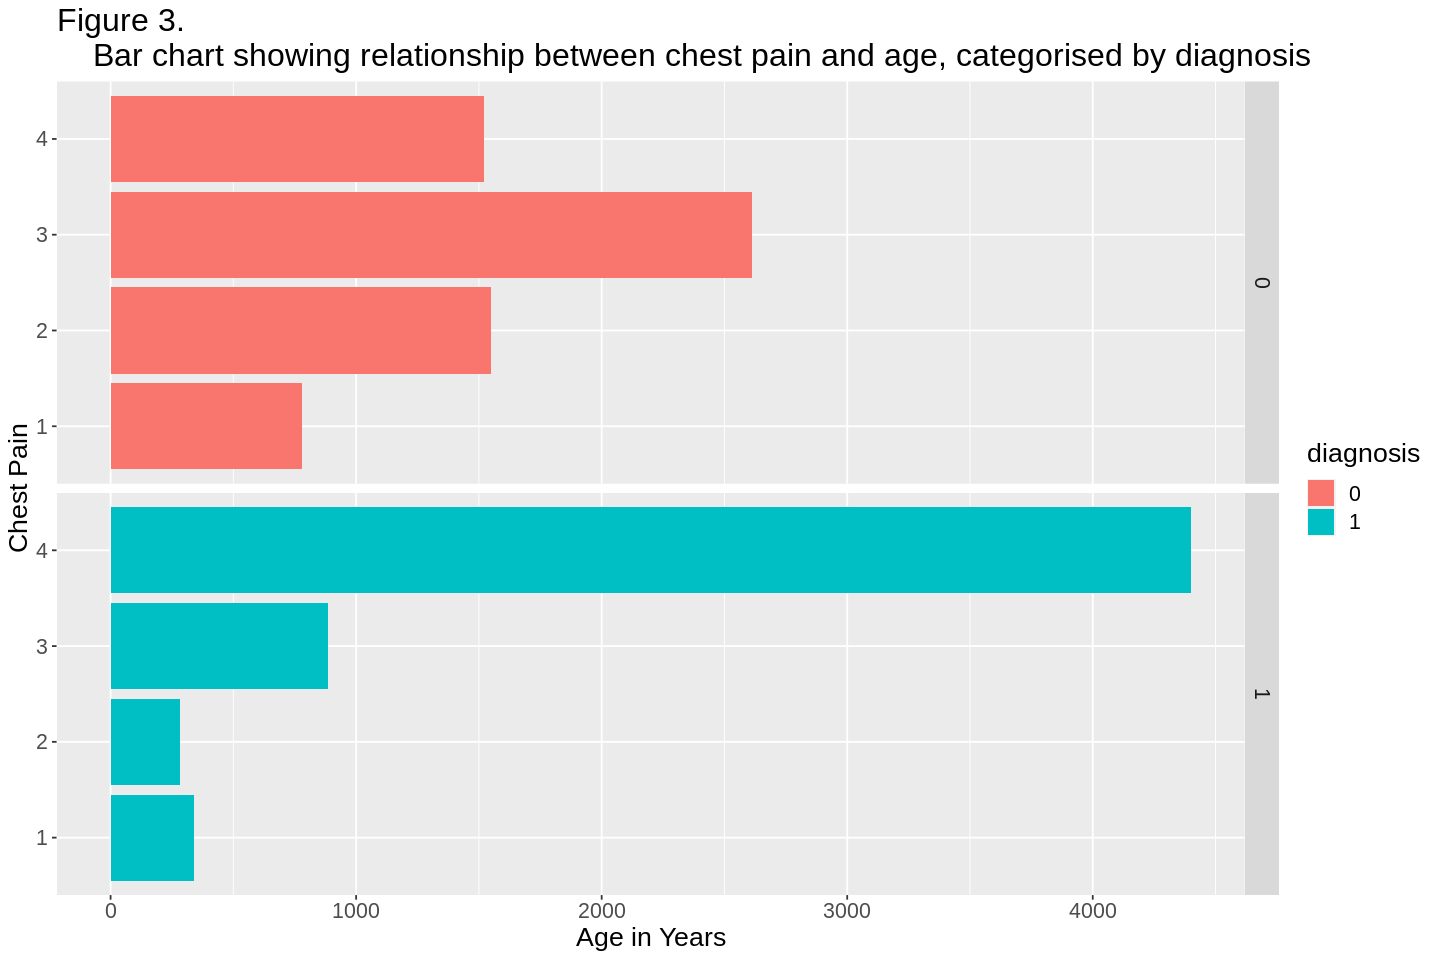

In [142]:
#bar chart showing the relations between age and chest pain, categorised by target
options(repr.plot.width = 12, repr.plot.height = 8) 
age_chest_bar <- heart_train |>
    ggplot(aes(x = age, y = chest_pain, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(rows = vars(diagnosis))+
    labs(x = "Age in Years", y = "Chest Pain")+
    ggtitle("Figure 3.
    Bar chart showing relationship between chest pain and age, categorised by diagnosis")+
    theme(text = element_text(size = 16))
age_chest_bar

#0 = negative diagnosis. 1 = positive diagnosis.

Diagnosis: 0 = absence of heart disease while 1 = presence of heart disease

Chest Pain: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic

Those with heart disease and have asymptomatic chest pain tend to be of older age, whereas the ages of without heart disease tend to be of similar distribution between all chest pain categories. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



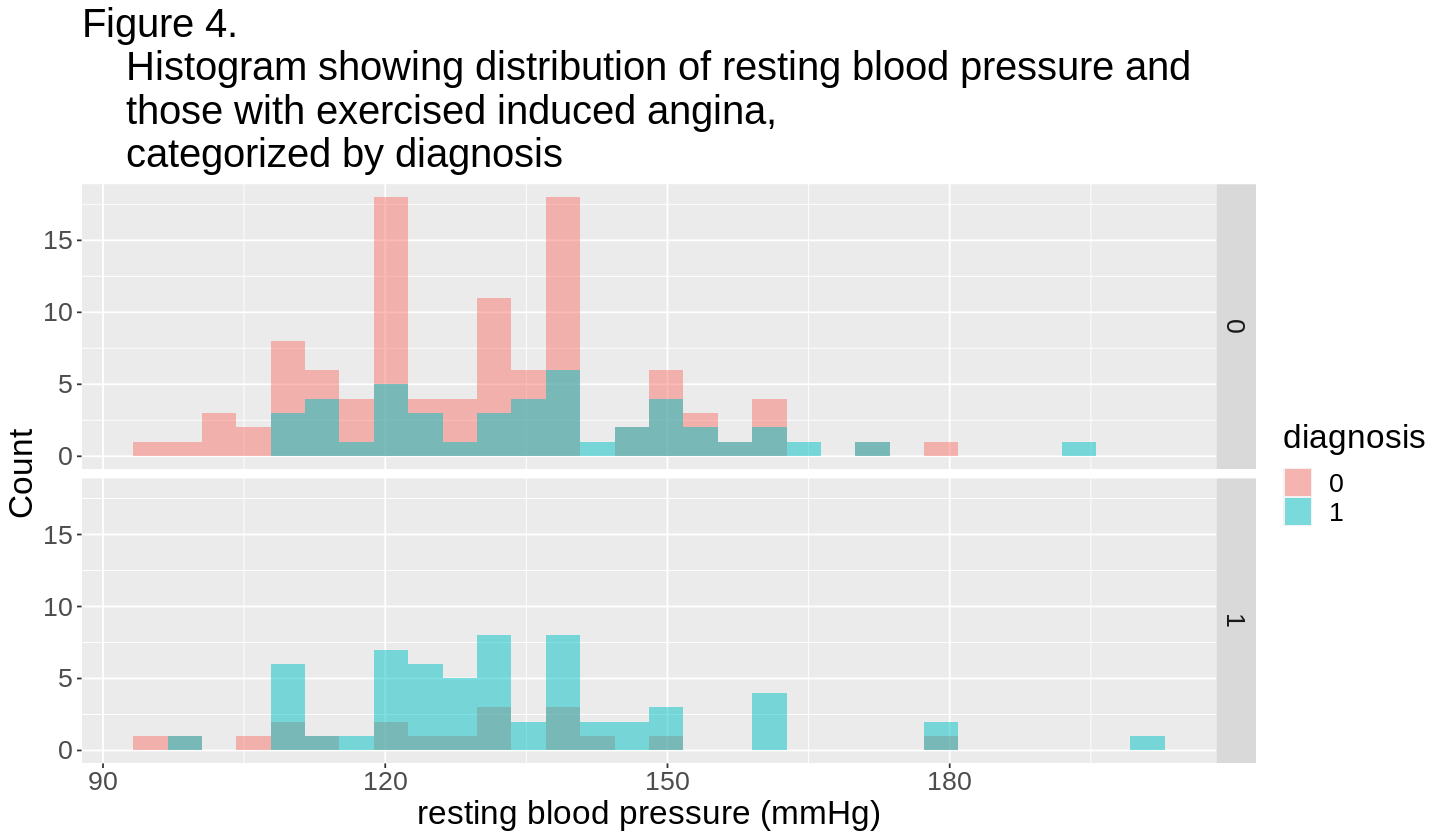

In [147]:
options(repr.plot.width = 12, repr.plot.height = 7)

max_slope_hist <- heart_train %>%
  ggplot(aes(x = resting_blood_pressure, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity") +
  facet_grid(rows = vars(exercise_induced_angina)) +
  labs(x = "resting blood pressure (mmHg)", y = "Count") +
  ggtitle("Figure 4. 
    Histogram showing distribution of resting blood pressure and 
    those with exercised induced angina, 
    categorized by diagnosis") +
  theme(text = element_text(size = 20))

max_slope_hist


Diagnosis: 0 = absence of heart disease while 1 = presence of heart disease

Exercise Induced Angina: 1 = yes; 0 = no 

There are more observations of no heart disease in people who do not have exercise induced angina whereas those with heart induced angina are less likely to not have heart disease.

**Step 12** Finding best K neighbors value and plotting accuracy vs. k-value

In [129]:
heart_select_scale <- heart_train |>
    select(chest_pain, resting_blood_pressure, exercise_induced_angina, ST_slope, age, sex, rest_ecg, diagnosis)

Warning message:
“tune samples were requested but there were 227 rows in the data. 222 will be used.”


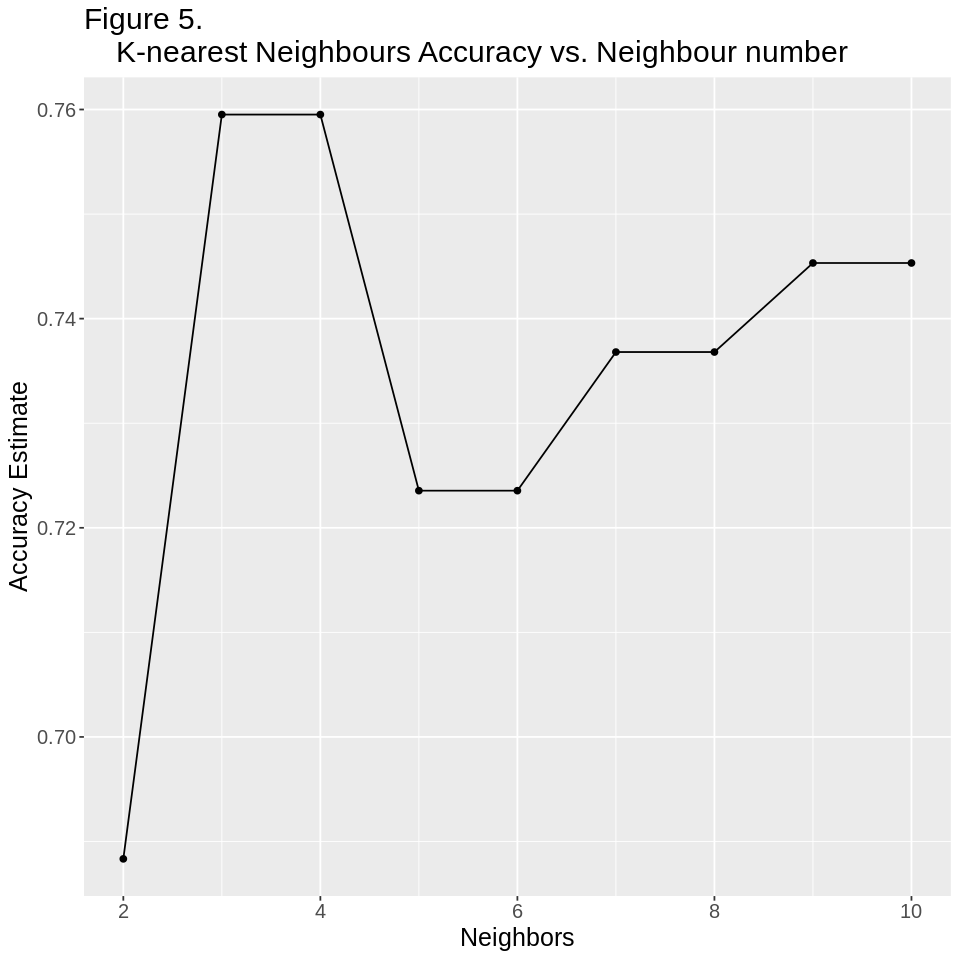

In [130]:
set.seed(20)
options(repr.plot.width = 8, repr.plot.height = 8) 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

recipe <- recipe(diagnosis ~., data = heart_select_scale) |>
                        step_scale(all_numeric()) |>
                        step_center(all_numeric()) |> 
    step_dummy(chest_pain, exercise_induced_angina, ST_slope, rest_ecg, sex)

fit <- workflow() |>
                    add_recipe(recipe) |>
                    add_model(knn_spec) |>
                    fit(data = heart_select_scale)

train_vfold <- vfold_cv(heart_select_scale, v = 10, strata = diagnosis)

k_lots <- tibble(neighbors = seq(from = 2, to = 10, by = 1))

knn_results <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = train_vfold, grid = k_lots) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 15)) + 
    ggtitle("Figure 5. 
    K-nearest Neighbours Accuracy vs. Neighbour number")
cross_val_plot

Number of k neighbours selected: 4

**Create model with best predictors and best k-value**

In [131]:
heart_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = 4)|>
set_engine("kknn")|>
set_mode("classification")

heart_fit <- workflow()|>
add_recipe(recipe)|>
add_model(heart_spec)|>
fit(data=heart_select_scale)

**Use test data with predictor model, display with table.**

In [138]:
heart_predictions <- predict(heart_fit, heart_test)|>
    bind_cols(heart_test)

heart_metrics <- heart_predictions|>
    metrics(truth = diagnosis, estimate = .pred_class)|> 
    slice(1)|> 
    select(-.estimator)

heart_conf_mat <- heart_predictions|>
    conf_mat(truth = diagnosis ,estimate = .pred_class)

print("Table 11. Matrix of Results of Model")
heart_conf_mat

print("Table 12. Accuracy Estimate of Model")
heart_metrics

[1] "Table 11. Matrix of Results of Model"


          Truth
Prediction  0  1
         0 34  8
         1  7 27

[1] "Table 12. Accuracy Estimate of Model"


.metric,.estimate
<chr>,<dbl>
accuracy,0.8026316


**Discussion**

From our data analysis using K-nearest neighbors classification, we found that our binary estimator had an accuracy of about 80.26%. This accuracy is on par with what we learned in this couse. However, we have discussed that even accuracies of 80% and greater may not be sufficient in producing high-value results. 

Based on the method we used pick predictors for our classification model, our group would have expected to have a higher accuracy result. 

Our findings could be impacted by our methods, since we used google to help us use tools learned during the regression portion of this course to find correlations between variables. In attempting to go beyond the scope of the course and apply our knowledge in novel ways, there is a possibility of error occuring on our end. An alternative method would have been to do more background research on the greatest known health symptoms corresponding to heart disease, and then manually selecting our predictors based on this background knowledge. 

There is a great potential for future questioning from the basis of data science project. For example, we can test our classification model to diagnosis the health conditions of new patients (outside of the database) and thus assign them a health condition that corresponds to their symptoms and current physiological state. There are also broader applications of a project like this, specifically in the realm of medicine and healthcare. There is a growing standardization and implementation of data and computer science models into healthcare workflows - making the diagnosis and treatment process for patients much more efficient. After all, in theory, a highly well trained model with high accuracy may outcompete a tired, overworked physician when it comes to accurately creating a diagnosis and treatment plan. This was once thought to be a futuristic idea, but the power of data and computer science is undeniable, and there is great promise that it may change the state of modern healthcare.

*Explanation for predictor choices:* 

We didn't use forward selection as mentioned in our proposal, a TA advised us not to as it was beyond the scope of this course. Thus, we set out to find another way to choose our best predictors without having to test the accuracy of 479001600 predictor combonations by hand. A quick google search led us to understand we can use what we learned in regression to view the correlations between varibles and use that to pick our predictors for classification (Carvalho et. al, 2019). Using the leaps package, an article by Atinakarim on medium walked us through how to do this (2021).  


**References** 

Atinakarim. (2021, May 25). Selecting the best predictors for linear regression in R. Medium. https://towardsdatascience.com/selecting-the-best-predictors-for-linear-regression-in-r-f385bf3d93e9 

Carvalho, P., López, D., &amp; Alex2006. (2019, April). How to determine which are the best predictor variables given a known classification?. Cross Validated. https://stats.stackexchange.com/questions/399711/how-to-determine-which-are-the-best-predictor-variables-given-a-known-classifica 

Lumley, T. (Version 3.1). leaps: Regression Subset Selection [Computer software]. Retrieved from CRAN. URL: https://rdrr.io/cran/leaps/

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. 
https://doi.org/10.24432/C52P4X.


.